In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma as gamma_function

In [0]:
total_nodes = 20
anchor_percent = 0.90
N = int((1 - anchor_percent) * total_nodes) # unknown nodes
M = total_nodes - N # anchor nodes

In [199]:
print(M)

19


In [0]:
# anchor nodes random placement
X_anchor = []

for i in range(M):
    x_anchor = np.random.randint(100)
    y_anchor = np.random.randint(100)

    X_anchor.append([x_anchor, y_anchor])

In [0]:
# unknown nodes random placement
X_unknown = []
for i in range(N):
    x_unknown = np.random.randint(100)
    y_unknown = np.random.randint(100)
  
    X_unknown.append([x_unknown, y_unknown])

In [0]:
X_unknown = np.array(X_unknown)
X_anchor = np.array(X_anchor)

In [0]:
# back up of original anchors and unknowns
X_anchor_og = X_anchor.copy()
X_unknown_bak = X_unknown.copy()

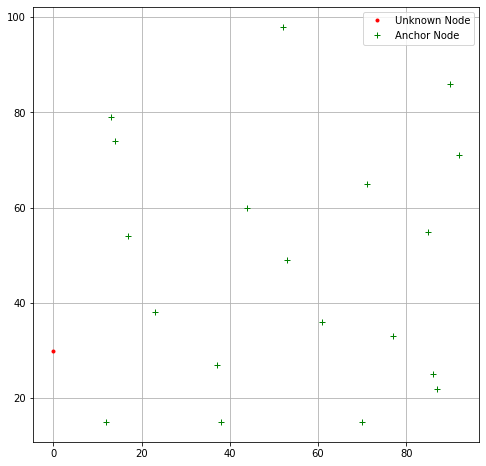

In [204]:
plt.figure(figsize=(8, 8))
plt.plot(X_unknown[:, 0], X_unknown[:, 1], 'r.', label="Unknown Node")
plt.plot(X_anchor[:, 0], X_anchor[:, 1], 'g+', label="Anchor Node")
plt.legend()
plt.grid()
plt.show()

In [0]:
t_range = 50 # transmission range
# t_range_best = 
gamma = 0.1 # noise factor

In [206]:
len(X_anchor)

19

In [0]:
#objective function need to minimize
def objective(x, y):
    l = []
    for j in range(len(X_anchor)): # for every anchor nodes
        dij = np.power((np.power((x - X_anchor[j][0]), 2) + np.power((y - X_anchor[j][1]), 2)), 0.5)
        dij_dash = dij + np.random.normal(0, (gamma*dij))
        
        if dij < t_range:
            l.append(X_anchor[j])
    if len(l) >= 3:
#         print(l, 'anchor nodes')
#         print(X_unknown[i], 'unknown nodes')
        m = len(l)
        rerror = []
        for ancn in l:
            dij = np.power((np.power((x - ancn[0]), 2) + np.power((y - ancn[1]), 2)), 0.5)
            dij_dash = dij + np.random.normal(0, (gamma*dij))
            rerror.append(np.power((dij - dij_dash), 2))

        return np.sum(rerror) / m
        return dij

In [0]:
v_x = []
for i in range(100):
    for j in range(100):
        if objective(i, j):
            v_x.append(objective(i, j))

In [0]:
# v_x

In [210]:
# threshold = ((np.max(v_x) - np.min(v_x))/2) #rejected
# threshold = np.min(v_x) + 4
mean_vx = np.mean(v_x)
threshold = (mean_vx - np.min(v_x))/2
# threshold = mean_vx - np.min(v_x)
print(threshold)

5.239011137138283


In [211]:
max_v = np.max(v_x)
print(max_v)

61.71645222941157


In [212]:
mean_vx = np.mean(v_x)
print(mean_vx)

10.819084657748936


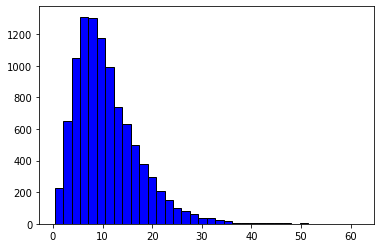

In [213]:
plt.hist(v_x, color = 'blue', edgecolor = 'black', bins = int(180/5))
# plt.bar(range(len(v_x)), v_x)
plt.show()

In [0]:
# X_unknown

In [0]:
# for i in range(N): # for every unknown nodes
# objective(84, 23)

In [0]:
alpha_min = 0.9
alpha_max = 1.0
pa_min = 0.05
pa_max = 0.25
X_min = 0
X_max = 100

In [0]:
N_itertotal = 100
# print(X_unknown)

In [0]:
fitness_values = []
for i in range(len(X_unknown)): # for every Unknown node
    fitness_values.append(objective(X_unknown[i][0], X_unknown[i][1]))

In [219]:
fitness_values

[9.77457526000512]

In [0]:
# #vk
# f_values_legal = []
# for i in range (len(fitness_values)):
#     if fitness_values[i] is None:
#         pass
#     else:
#         f_values_legal.append(fitness_values[i])

In [0]:
#vk
# f_values_legal

In [0]:
# print(X_unknown)

In [0]:
# import scipy.stats

In [0]:
def alpha(n_iter):
    return alpha_max - ((n_iter/ N_itertotal) * (alpha_max - alpha_min))

# Levy Flight
def levy():
    # lamda = np.random.uniform(1.1,3)
    lamda = 1.5
    temp = np.power(((gamma_function(1 + lamda) * np.sin(np.pi * (lamda /2))) / (gamma_function((1 + lamda)/2) * lamda * np.power(2, ((lamda - 1)/2)) )), 1/lamda)
    u = np.random.normal(0, temp)
    v = np.random.normal(0,1)
    r = u / (np.power(abs(v), (1/lamda)))

    return r

In [225]:
levy()

-0.4958444684484066

In [0]:
# print(X_unknown)
# print(len(X_unknown))

In [0]:
# np.zeros([N, 2])

In [0]:
# state_root = [anc_state,unknown_state]

In [229]:
# X_unknown_org1 = np.zeros([N, 2])
# X_unknown_org2 = np.zeros([N, 2])

ales = []
X_calc = [] # final coordinates

N_iter = 1
while (N_iter < N_itertotal) : # termination condition
  X_js = []
  for i in range(len(X_unknown)): # For every unknown node
    X_j = X_unknown[i]
    X_j[0] = X_unknown[i][0] + alpha(N_iter) * levy()
    X_j[1] = X_unknown[i][1] + alpha(N_iter) * levy()
    # print(X_j)
    # print(X_j[0])
    my_x = np.random.randint(100)
    my_y = np.random.randint(100)
    X_rand = [my_x, my_y]
    if X_j[0] > X_max and X_j[1] > X_max:
      # X_j = [X_max, X_max]
      X_j = X_rand
    elif X_j[0] > X_max and X_min < X_j[1] < X_max:
      # X_j = [X_max, X_j[1]]
      X_j = X_rand
    elif X_j[0] > X_max and X_j[1] < X_min:
      # X_j = [X_max, X_min]
      X_j = X_rand
    elif X_min < X_j[0] < X_max and X_j[1] < X_min:
      # X_j = [X_j[0], X_min]
      X_j = X_rand
    elif X_j[0] < X_min and X_j[1] < X_min:
      # X_j = [X_min, X_min]
      X_j = X_rand
    elif X_j[0] < X_min and X_min < X_j[1] < X_max:
      # X_j = [X_min, X_j[1]]
      X_j = X_rand
    elif X_j[0] < X_min and X_j[1] > X_max:
      # X_j = [X_min, X_max]
      X_j = X_rand
    elif X_min < X_j[0] < X_max and X_j[1] > X_max:
      # X_j = [X_j[0], X_max]
      X_j = X_rand

    # Comparing random walked solution with unknown nodes' solution
    F_j = objective(X_j[0], X_j[1]) or 0
    rand_k = np.random.randint(0, len(X_unknown))
    F_k = objective(X_unknown[rand_k][0], X_unknown[rand_k][1]) or 0

    if F_j > F_k:
      X_j[0] = X_unknown[rand_k][0]
      X_j[1] = X_unknown[rand_k][1]
      F_j = F_k

    X_js.append(X_j)
    # X_js is a list of current iteration's solutions
    # print(X_j)
    #end if
  #End For
  # print(X_js)

  # Fitness values of current iteration's solutions
  Obj_X_Js = []
  for i in range(len(X_js)):
    Obj_X_Js.append(objective(X_js[i][0], X_js[i][1]))

  # print(Obj_X_Js)

  # best solution selection
  Obj_X_Js = np.array([np.inf if i is None else i for i in Obj_X_Js])
  # print(Obj_X_Js)
  F_min = Obj_X_Js[np.argmin(Obj_X_Js)]
  # print(F_min)

  # Mutation probability
  Pa_j = []

  for i in Obj_X_Js:
    K = i - F_min
    if K < 1:
      Pa_j.append(pa_min + (pa_max - pa_min) * K)
    else:
      Pa_j.append(pa_max / N_iter)

  # print(Pa_j)

  # new random solutions generation according to mutation probability
  for i in range(len(Pa_j)):
    rand_temp = np.random.uniform(0, 1)
    if rand_temp < Pa_j[i]:
      my_x = np.random.randint(100)
      my_y = np.random.randint(100)
      X_js[i] = [my_x, my_y]
    #end if
  #end for



  # Finding best solution after replacement with new random solutions
  # Make copy of X_unknown
  X_unknown_copy = X_unknown.copy()
  X_unknown = X_js

  #MARK
  # Calculating fitness values of random replacement updated (mutated) unknown nodes
  Obj_X_unknown = []
  for i in range(len(X_unknown)):
    Obj_X_unknown.append(objective(X_unknown[i][0], X_unknown[i][1]))

  Obj_X_unknown = np.array([np.inf if i is None else i for i in Obj_X_unknown])
  # print(Obj_X_unknown)
  F_best_arg = np.argmin(Obj_X_unknown) # Index of the best valued solution

  F_best_args = []
  for i in range(len(Obj_X_unknown)):
    if Obj_X_unknown[i] < threshold:
        F_best_args.append(i)

  print(F_best_args)


  # Updating Anchor List
  for i in F_best_args:
    print('check', Obj_X_unknown[i])
    X_anchor_temp = list(X_anchor)
    X_anchor_temp.append(X_unknown[i])
    X_anchor = np.array(X_anchor_temp)
    
  # Updating Unknown List    
  X_unknown_temp = []
  for i in range(len(X_unknown)):
    if i in F_best_args:
      ales.append([X_unknown[i], X_unknown_copy[i]])
      X_calc.append(X_unknown[i])
    else:
      X_unknown_temp.append(X_unknown[i])
    

  X_unknown = np.array(X_unknown_temp)


  # 1. When no unknown nodes left are localisable
  if len(X_unknown) == 0:
        break

  N_iter += 1
      

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0]
check 3.7197031917645176


In [230]:
N_iter

29

In [0]:
X_unknown = np.array(X_unknown)
X_calc = np.array(X_calc)

In [232]:
print(len(X_unknown))
print(len(X_calc))

0
1


In [252]:
# fitness values of final coordinates (solutions)
Obj_X_calc = []
for i in range (len(X_calc)):
  Obj_X_calc.append(objective(X_calc[i][0], X_calc[i][1]))

print(Obj_X_calc)
X_calc_avg = np.average(Obj_X_calc)
print(X_calc_avg)

[13.418593319315795]
13.418593319315795


In [253]:
q = 0
for i in range (len(Obj_X_calc)):
  if Obj_X_calc[i] >= threshold:
    # print(i)
    # print(Obj_X_calc[i])
    q += 1
print(q)

1


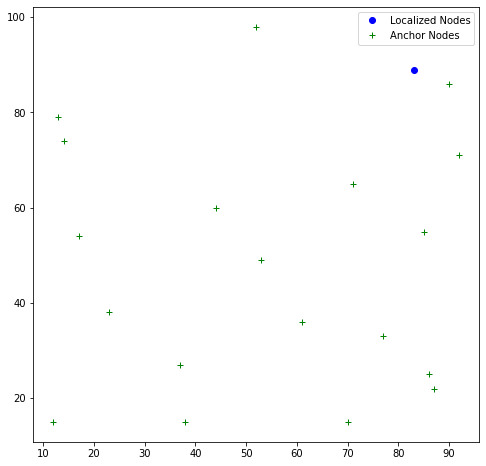

In [254]:
plt.figure(figsize=(8, 8))
# plt.plot(X_unknown_bak[:80, 0], X_unknown_bak[:80, 1], 'ro', label="Unknown Nodes")
plt.plot(X_anchor[M:, 0], X_anchor[M:, 1], 'bo', label="Localized Nodes")
plt.plot(X_anchor_og[:, 0], X_anchor_og[:, 1], 'g+', label="Anchor Nodes")
if len(X_unknown) != 0 :
  plt.plot(X_unknown[:, 0], X_unknown[:, 1], 'yo', label="Left Nodes")
plt.legend()
plt.show()

In [0]:
# Localization Success Ratio
def lsr():
    return ((len(X_anchor) - M) / len(X_unknown_bak)) * 100

In [160]:
print(len(X_anchor))
print(M)
print(len(X_unknown_bak))

20
19
1


In [161]:
lsr()

100.0

In [0]:
# For observations (retaining original topology)
X_anchor = X_anchor_og
X_unknown = X_unknown_bak
# print(len(X_unknown))

In [163]:
# Average Localization Error

ales

eculidean_dists = []

for al in ales:
    estimated = al[0]
    real = al[1]
    eculidean_dists.append( np.sqrt((estimated[0] - real[0])**2 + (estimated[1] - real[1])**2) )
#     print(al[0])

np.sum(ales)/len(ales)

170.0

In [0]:
# 1. When no unknown nodes left are localisable
# 2. Add multiple unknown nodes into anchor nodes
# 3. Capture results

In [0]:
#plotly
#seaborn

### PLOTS

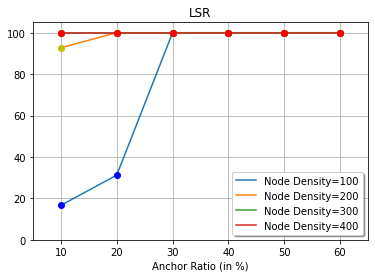

In [33]:
# IMPROVED
# lsr graph (Anc. Ratio)
anc_density = [10, 20, 30, 40, 50, 60]
lsr_100 = [16.6666, 31.25, 100, 100, 100, 100]
lsr_200 = [92.7777, 100, 100, 100, 100, 100]
lsr_300 = [100, 100, 100, 100, 100, 100]
lsr_400 = [100, 100, 100, 100, 100, 100]

plt.xlabel("Anchor Ratio (in %)")
# plt.ylabel("Localization Success Ratio")
plt.title("LSR")

plt.plot(anc_density, lsr_100, label="Node Density=100")
plt.plot(anc_density, lsr_100, 'bo')
plt.plot(anc_density,lsr_200, label="Node Density=200")
plt.plot(anc_density, lsr_200, 'yo')
plt.plot(anc_density,lsr_300, label="Node Density=300")
plt.plot(anc_density, lsr_300, 'go')
plt.plot(anc_density,lsr_400, label="Node Density=400")
plt.plot(anc_density, lsr_400, 'ro')

plt.legend(shadow='true')
plt.axis([5,65,0,105])
plt.grid()
plt.show()

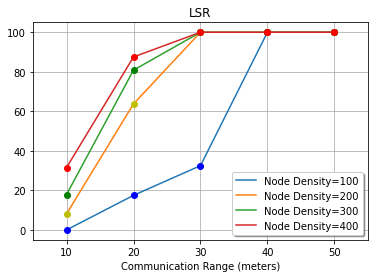

In [35]:
# IMPROVED
# lsr graph (T Range)
trans_range = [10, 20, 30, 40, 50]
lsr_100 = [0, 17.5, 32.5, 100, 100]
lsr_200 = [8.125, 63.7499, 100, 100, 100]
lsr_300 = [17.91, 80.833, 100, 100, 100]
lsr_400 = [31.5625, 87.5, 100, 100, 100]

plt.xlabel("Communication Range (meters)")
# plt.ylabel("Localization Succes Ratio")
plt.title("LSR")

plt.plot(trans_range, lsr_100, label="Node Density=100")
plt.plot(trans_range, lsr_100, 'bo')
plt.plot(trans_range, lsr_200, label="Node Density=200")
plt.plot(trans_range, lsr_200, 'yo')
plt.plot(trans_range, lsr_300, label="Node Density=300")
plt.plot(trans_range, lsr_300, 'go')
plt.plot(trans_range, lsr_400, label="Node Density=400")
plt.plot(trans_range, lsr_400, 'ro')

plt.legend(shadow='true')
plt.axis([5,55,-5,105])
plt.grid()
plt.show()

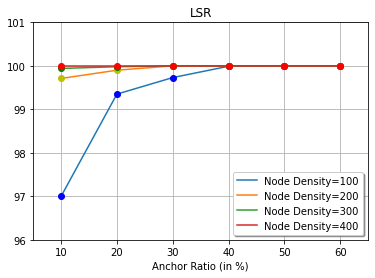

In [36]:
# BASE
# lsr graph (Anc. Ratio)
anc_density = [10, 20, 30, 40, 50, 60]
lsr_100 = [97, 99.35, 99.73, 99.99, 100, 100]
lsr_200 = [99.71, 99.90, 100, 100, 100, 100]
lsr_300 = [99.94, 99.98, 100, 100, 100, 100]
lsr_400 = [100, 100, 100, 100, 100, 100]

plt.xlabel("Anchor Ratio (in %)")
# plt.ylabel("Localization Success Ratio")
plt.title("LSR")

plt.plot(anc_density, lsr_100, label="Node Density=100")
plt.plot(anc_density, lsr_100, 'bo')
plt.plot(anc_density,lsr_200, label="Node Density=200")
plt.plot(anc_density, lsr_200, 'yo')
plt.plot(anc_density,lsr_300, label="Node Density=300")
plt.plot(anc_density, lsr_300, 'go')
plt.plot(anc_density,lsr_400, label="Node Density=400")
plt.plot(anc_density, lsr_400, 'ro')

plt.legend(shadow='true')
plt.axis([5,65,96,101])
plt.grid()
plt.show()

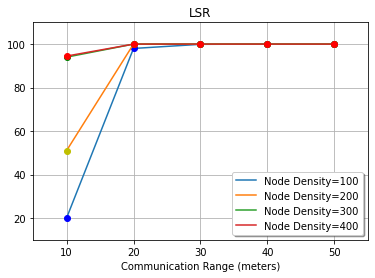

In [37]:
# BASE
# lsr graph (T Range)
trans_range = [10, 20, 30, 40, 50]
lsr_100 = [20, 98, 99.9, 100, 100]
lsr_200 = [51, 100, 100, 100, 100]
lsr_300 = [94, 100, 100, 100, 100]
lsr_400 = [94.5, 100, 100, 100, 100]

plt.xlabel("Communication Range (meters)")
# plt.ylabel("Localization Success Ratio")
plt.title("LSR")

plt.plot(trans_range, lsr_100, label="Node Density=100")
plt.plot(trans_range, lsr_100, 'bo')
plt.plot(trans_range, lsr_200, label="Node Density=200")
plt.plot(trans_range, lsr_200, 'yo')
plt.plot(trans_range, lsr_300, label="Node Density=300")
plt.plot(trans_range, lsr_300, 'go')
plt.plot(trans_range, lsr_400, label="Node Density=400")
plt.plot(trans_range, lsr_400, 'ro')

plt.legend(shadow='true')
plt.axis([5,55,10,110])
plt.grid()
plt.show()

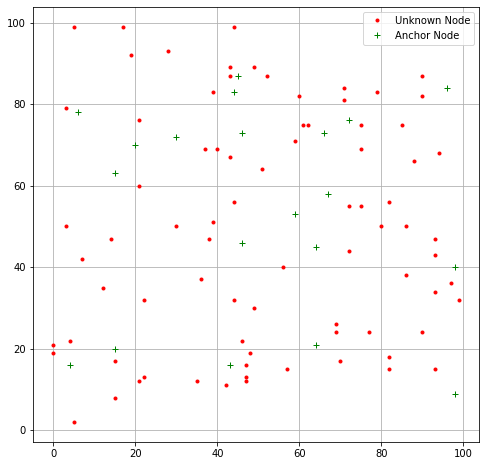

In [43]:
total_nodes = 100
anchor_percent = 0.20
N = int((1 - anchor_percent) * total_nodes) # unknown nodes
M = total_nodes - N # anchor nodes

# anchor nodes random placement
X_anchor = []

for i in range(M):
    x_anchor = np.random.randint(100)
    y_anchor = np.random.randint(100)

    X_anchor.append([x_anchor, y_anchor])

# unknown nodes random placement
X_unknown = []
for i in range(N):
    x_unknown = np.random.randint(100)
    y_unknown = np.random.randint(100)
  
    X_unknown.append([x_unknown, y_unknown])

X_unknown = np.array(X_unknown)
X_anchor = np.array(X_anchor)

#plot
plt.figure(figsize=(8, 8))
plt.plot(X_unknown[:, 0], X_unknown[:, 1], 'r.', label="Unknown Node")
plt.plot(X_anchor[:, 0], X_anchor[:, 1], 'g+', label="Anchor Node")
plt.legend()
plt.grid()
plt.show()

In [256]:
!cat /proc/meminfo

MemTotal:       13333556 kB
MemFree:        10611100 kB
MemAvailable:   12472496 kB
Buffers:           76832 kB
Cached:          1904680 kB
SwapCached:            0 kB
Active:           730952 kB
Inactive:        1735284 kB
Active(anon):     426304 kB
Inactive(anon):      316 kB
Active(file):     304648 kB
Inactive(file):  1734968 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               516 kB
Writeback:             0 kB
AnonPages:        484712 kB
Mapped:           242460 kB
Shmem:               900 kB
Slab:             162976 kB
SReclaimable:     125348 kB
SUnreclaim:        37628 kB
KernelStack:        3440 kB
PageTables:         5688 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    2597996 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [257]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [258]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   31G   72G  31% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   33G   82G  29% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
